In [377]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '5,6'
import os
os.environ["CUDA_VISIBLE_DEVICES"]="5,6"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [378]:
# Using seaborn for pairplot.
!pip install -q seaborn
!pip install -q tensorflow

In [379]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
 
import tensorflow as tf
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print(tf.__version__)

2.14.0


In [380]:
# Load the CSV file
df = pd.read_csv('Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data_20240819.csv')

# Select the required columns
required_columns = ['Global_X', 'Global_Y', 'v_Vel', 'v_Acc', 'Global_Time', 'Vehicle_ID']
velocity_dataset = df[required_columns]

In [381]:
velocity_dataset.shape

(9455901, 6)

In [382]:
velocity_dataset.head()

,Global_X,Global_Y,v_Vel,v_Acc,Global_Time,Vehicle_ID
0,6451203.729,1873252.549,23.31,2.05,1118848075000,515
1,6451203.729,1873252.549,23.31,2.05,1118848075000,515
2,6042814.264,2133542.012,26.54,-0.76,1113437421700,2224
3,6452425.122,1872172.475,37.52,11.20,1118847624800,2127
4,6452347.673,1872258.452,41.99,0.10,1118848324700,1033


In [383]:
velocity_dataset_sorted = velocity_dataset.sort_values(by=['Vehicle_ID', 'Global_Time']).reset_index(drop=True)

In [384]:
velocity_dataset_sorted

,Global_X,Global_Y,v_Vel,v_Acc,Global_Time,Vehicle_ID
0,6042841.908,2133120.155,12.50,0.00,1113433136300,1
1,6042839.670,2133135.799,14.64,0.08,1113433137500,1
2,6042839.214,2133138.665,14.59,-0.54,1113433137700,1
3,6042838.525,2133142.971,14.13,-3.49,1113433138000,1
4,6042837.417,2133153.456,13.00,0.00,1113433138800,1
...,...,...,...,...,...,...
9455896,6042608.928,2134671.977,63.93,-11.20,1113433457400,3366
9455897,6042607.952,2134678.398,62.22,-11.20,1113433457500,3366
9455898,6042606.994,2134684.573,62.22,0.00,1113433457600,3366
9455899,6042606.083,2134690.504,62.22,0.00,1113433457700,3366


In [385]:
# # Count the number of unique vehicle IDs
# unique_vehicle_ids = velocity_dataset['Vehicle_ID'].nunique()
# print(f"Number of unique vehicle IDs: {unique_vehicle_ids}")

# # Count how many rows of data each vehicle ID has
# vehicle_counts = velocity_dataset['Vehicle_ID'].value_counts()

# # Display the counts of rows for each vehicle ID
# print("\nNumber of rows for each vehicle ID:")
# print(vehicle_counts)

In [386]:
# # Access the count for a particular vehicle ID
# specific_vehicle_id = 396
# num_rows = vehicle_counts[specific_vehicle_id]

# print(f"The vehicle ID '{specific_vehicle_id}' has {num_rows} rows of data.")

# single_vehicle_data = velocity_dataset_sorted[velocity_dataset_sorted['Vehicle_ID'] == specific_vehicle_id]

In [387]:
# single_vehicle_data.head()

In [388]:
# # The relevant columns for normalization (velocity, Global_X, and Global_Y)
# data_to_normalize = velocity_dataset_sorted[['v_Vel', 'Global_X', 'Global_Y']]

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit the scaler on the relevant data and transform it
# data_normalized = scaler.fit_transform(data_to_normalize)

# # Convert back to DataFrame for easier manipulation (3 columns)
# data_normalized_df = pd.DataFrame(data_normalized, columns=['v_Vel', 'Global_X', 'Global_Y'])

# # Verify the normalized data
# print(data_normalized_df.head())

In [389]:
# # Appending the non-normalized columns (v_Acc, Global_Time, Vehicle_ID) back if needed
# data_normalized_df['v_Acc'] = velocity_dataset_sorted['v_Acc'].values
# data_normalized_df['Global_Time'] = velocity_dataset_sorted['Global_Time'].values
# data_normalized_df['Vehicle_ID'] = velocity_dataset_sorted['Vehicle_ID'].values

# # Verify the final DataFrame
# print(data_normalized_df.head())

In [390]:
# Count the number of unique vehicle IDs
unique_vehicle_ids = velocity_dataset['Vehicle_ID'].nunique()
print(f"Number of unique vehicle IDs: {unique_vehicle_ids}")

# Count how many rows of data each vehicle ID has
vehicle_counts = velocity_dataset['Vehicle_ID'].value_counts()

# Display the counts of rows for each vehicle ID
print("\nNumber of rows for each vehicle ID:")
print(vehicle_counts)

Number of unique vehicle IDs: 3233

Number of rows for each vehicle ID:
396     8311
705     7508
567     7441
601     7253
468     7206
        ... 
2897     167
2806      78
2815      70
2810      66
2781      60
Name: Vehicle_ID, Length: 3233, dtype: int64


In [391]:
# # Access the count for a particular vehicle ID
# specific_vehicle_id = 396
# num_rows = vehicle_counts[specific_vehicle_id]

# print(f"The vehicle ID '{specific_vehicle_id}' has {num_rows} rows of data.")

# single_vehicle_data = data_normalized_df[data_normalized_df['Vehicle_ID'] == specific_vehicle_id]

In [392]:
# Access the count for a particular vehicle ID, and create its single dataset
specific_vehicle_id = 705
num_rows = vehicle_counts[specific_vehicle_id]

print(f"The vehicle ID '{specific_vehicle_id}' has {num_rows} rows of data.")

single_vehicle_data = velocity_dataset_sorted[velocity_dataset_sorted['Vehicle_ID'] == specific_vehicle_id]

The vehicle ID '705' has 7508 rows of data.


In [393]:
single_vehicle_data.head()

,Global_X,Global_Y,v_Vel,v_Acc,Global_Time,Vehicle_ID
2719660,2230819.967,1377076.458,17.73,0.0,1163451500,705
2719661,2230820.493,1377074.741,17.73,0.0,1163451600,705
2719662,2230821.011,1377073.026,17.73,0.0,1163451700,705
2719663,2230821.521,1377071.314,17.73,0.0,1163451800,705
2719664,2230822.022,1377069.604,17.73,0.0,1163451900,705


In [394]:
# # The relevant columns for normalization (velocity, Global_X, and Global_Y)
# data_to_normalize = single_vehicle_data[['v_Vel', 'Global_X', 'Global_Y']]

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit the scaler on the relevant data and transform it
# data_normalized = scaler.fit_transform(data_to_normalize)

# # Convert back to DataFrame for easier manipulation (3 columns)
# data_normalized_df = pd.DataFrame(data_normalized, columns=['v_Vel', 'Global_X', 'Global_Y'])

# # Verify the normalized data
# print(data_normalized_df.head())

In [395]:
# # Appending the non-normalized columns (v_Acc, Global_Time, Vehicle_ID) back if needed
# data_normalized_df['v_Acc'] = single_vehicle_data['v_Acc'].values
# data_normalized_df['Global_Time'] = single_vehicle_data['Global_Time'].values
# data_normalized_df['Vehicle_ID'] = single_vehicle_data['Vehicle_ID'].values

# # Verify the final DataFrame
# print(data_normalized_df.head())

In [396]:
# # Trying Standardization Instead of Min-Max Scaling (1st alternative to fix the model and its losses)

# # Access the count for a particular vehicle ID and create its dataset
# specific_vehicle_id = 705

# # Filter the dataset for the specific vehicle ID
# single_vehicle_data = velocity_dataset_sorted[velocity_dataset_sorted['Vehicle_ID'] == specific_vehicle_id]

# # Apply standardization on the filtered data
# scaler = StandardScaler()
# scaled_single_vehicle_data = single_vehicle_data.copy()
# scaled_single_vehicle_data[['Global_X', 'Global_Y', 'v_Vel']] = scaler.fit_transform(
#     single_vehicle_data[['Global_X', 'Global_Y', 'v_Vel']]
# )

# # Add back the Vehicle_ID and other columns for reference
# scaled_single_vehicle_data[['Vehicle_ID', 'v_Acc', 'Global_Time']] = single_vehicle_data[['Vehicle_ID', 'v_Acc', 'Global_Time']]

# # Verify the scaled data and confirm Vehicle_ID
# print(scaled_single_vehicle_data.head())

In [397]:
# # Implementing log transformation on 'Global_X' and 'Global_Y'

# # Select the specific vehicle ID to work with
# specific_vehicle_id = 705
# single_vehicle_data = velocity_dataset_sorted[velocity_dataset_sorted['Vehicle_ID'] == specific_vehicle_id].copy()

# # Apply log transformation on 'Global_X' and 'Global_Y' only
# single_vehicle_data['Global_X'] = np.log(single_vehicle_data['Global_X'] + 1)  # Adding 1 to avoid log(0)
# single_vehicle_data['Global_Y'] = np.log(single_vehicle_data['Global_Y'] + 1)

# # Apply standardization to 'v_Vel' if needed
# scaler_velocity = StandardScaler()
# single_vehicle_data['v_Vel'] = scaler_velocity.fit_transform(single_vehicle_data[['v_Vel']])

# # Verify transformed data
# print(single_vehicle_data.head())

In [400]:
# Implementing Quantile transformations

# Extract data for this vehicle ID
single_vehicle_data = velocity_dataset_sorted[velocity_dataset_sorted['Vehicle_ID'] == specific_vehicle_id].copy()

# Apply Quantile Transformation only on 'Global_X' and 'Global_Y'
quantile_transformer = QuantileTransformer(output_distribution='normal', n_quantiles=100, random_state=0)

# Fit and transform only Global_X and Global_Y for the specific vehicle ID
single_vehicle_data[['Global_X', 'Global_Y']] = quantile_transformer.fit_transform(single_vehicle_data[['Global_X', 'Global_Y']])

# Apply standardization to 'v_Vel' if needed
scaler_velocity = StandardScaler()
single_vehicle_data['v_Vel'] = scaler_velocity.fit_transform(single_vehicle_data[['v_Vel']])

# Display the transformed data
print(single_vehicle_data.head())

         Global_X  Global_Y     v_Vel  v_Acc  Global_Time  Vehicle_ID
2719660 -0.605187 -0.588835 -0.192741    0.0   1163451500         705
2719661 -0.598429 -0.589289 -0.192741    0.0   1163451600         705
2719662 -0.590015 -0.589742 -0.192741    0.0   1163451700         705
2719663 -0.581772 -0.590195 -0.192741    0.0   1163451800         705
2719664 -0.574237 -0.590647 -0.192741    0.0   1163451900         705


In [399]:
# # Instantiate the scaler
# scaler = StandardScaler()

# # Apply z-score normalization to 'Global_X', 'Global_Y', and 'v_Vel'
# single_vehicle_data[['Global_X', 'Global_Y', 'v_Vel']] = scaler.fit_transform(single_vehicle_data[['Global_X', 'Global_Y', 'v_Vel']])

# # Check the first few rows to confirm the transformation
# print(single_vehicle_data.head())

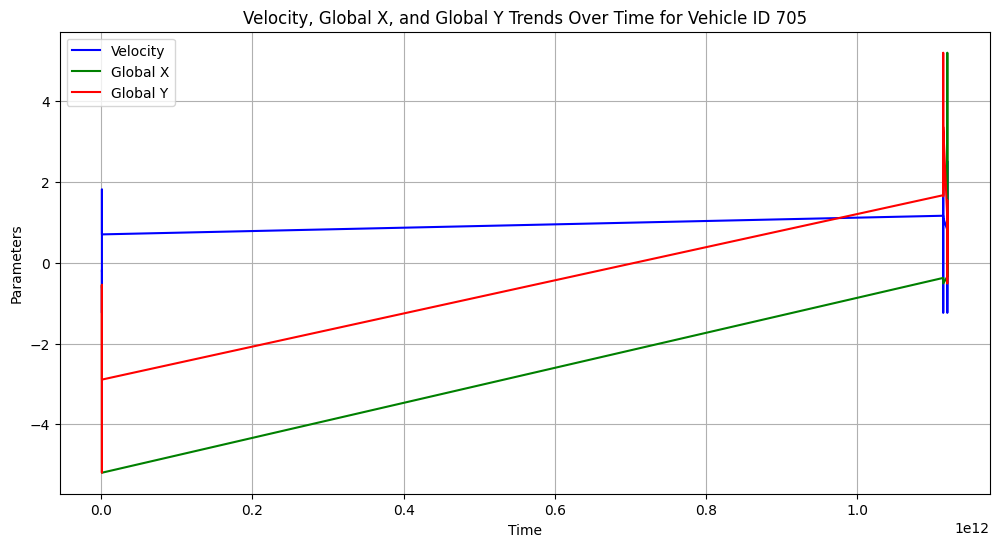

In [401]:
# Assuming 'single_vehicle_data' contains the data for a specific vehicle ID
# Extracting the time and other columns
time = single_vehicle_data['Global_Time'].values
velocity = single_vehicle_data['v_Vel'].values
x_values = single_vehicle_data['Global_X'].values
y_values = single_vehicle_data['Global_Y'].values

# Plot the parameters against time
plt.figure(figsize=(12, 6))

# Plot each parameter with different colors and labels
plt.plot(time, velocity, label='Velocity', color='blue')
plt.plot(time, x_values, label='Global X', color='green')
plt.plot(time, y_values, label='Global Y', color='red')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Parameters')
plt.title('Velocity, Global X, and Global Y Trends Over Time for Vehicle ID {}'.format(specific_vehicle_id))

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [402]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    # Ensure data is in DataFrame format with proper column names
    df_s = pd.DataFrame(data, columns=['v_Vel', 'Global_X', 'Global_Y'])
    cols, names = [], []
    
    # Input sequence for each feature (velocity, x, y)
    for i in range(n_in, 0, -1):
        cols.append(df_s.shift(i))
        names += [f'velocity(t-{i})', f'x(t-{i})', f'y(t-{i})']
        
    # Forecast sequence for x and y (outputs)
    for i in range(0, n_out):
        cols.append(df_s[['Global_X', 'Global_Y']].shift(-i))
        if i == 0:
            names += [f'x(t)', f'y(t)']
        else:
            names += [f'x(t+{i})', f'y(t+{i})']
    
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

In [403]:
# # Extract the velocity, Global_X, and Global_Y columns as a DataFrame
# data = single_vehicle_data[['v_Vel', 'Global_X', 'Global_Y']]

# # Convert the time series into a supervised learning problem
# n_in = 8  # Number of previous time steps to use as input
# n_out = 1  # Number of future time steps to predict (1 step ahead)
# supervised_data = series_to_supervised(data, n_in=n_in, n_out=n_out)

# # Print the first few rows to verify the transformation
# print(supervised_data.head())

In [404]:
# Extract the velocity, Global_X, and Global_Y columns as a DataFrame
data = single_vehicle_data[['v_Vel', 'Global_X', 'Global_Y']]

# Convert the time series into a supervised learning problem
n_in = 8  # Number of previous time steps to use as input
n_out = 1  # One future time step for Global_X and Global_Y (1 step * 2 features = 2)

supervised_data = series_to_supervised(data, n_in=n_in, n_out=n_out)

# Print the first few rows to verify the transformation
print(supervised_data.head())

         velocity(t-8)    x(t-8)    y(t-8)  velocity(t-7)    x(t-7)    y(t-7)  \
2719668      -0.192741 -0.605187 -0.588835      -0.192741 -0.598429 -0.589289   
2719669      -0.192741 -0.598429 -0.589289      -0.192741 -0.590015 -0.589742   
2719670      -0.192741 -0.590015 -0.589742      -0.192741 -0.581772 -0.590195   
2719671      -0.192741 -0.581772 -0.590195      -0.192741 -0.574237 -0.590647   
2719672      -0.192741 -0.574237 -0.590647      -0.192741 -0.571877 -0.591099   

         velocity(t-6)    x(t-6)    y(t-6)  velocity(t-5)  ...    x(t-3)  \
2719668      -0.192741 -0.590015 -0.589742      -0.192741  ... -0.571877   
2719669      -0.192741 -0.581772 -0.590195      -0.192741  ... -0.569563   
2719670      -0.192741 -0.574237 -0.590647      -0.192741  ... -0.567285   
2719671      -0.192741 -0.571877 -0.591099      -0.196290  ... -0.565049   
2719672      -0.196290 -0.569563 -0.591549      -0.199839  ... -0.562853   

           y(t-3)  velocity(t-2)    x(t-2)    y(t-2)  ve

In [405]:
# Split the supervised data into training, validation, and test sets
n_train = int(len(supervised_data) * 0.7)
n_validation = int(len(supervised_data) * 0.15)

train_data = supervised_data[:n_train]
validation_data = supervised_data[n_train:n_train + n_validation]
test_data = supervised_data[n_train + n_validation:]

# # Separate inputs (X) and outputs (y)
# X_train, y_train = train_data.iloc[:, :-n_out].values, train_data.iloc[:, -n_out:].values
# X_validation, y_validation = validation_data.iloc[:, :-n_out].values, validation_data.iloc[:, -n_out:].values
# X_test, y_test = test_data.iloc[:, :-n_out].values, test_data.iloc[:, -n_out:].values

# Separate inputs (X) and outputs (y) again, considering that you have 3 features * n_in time steps and output shape of 2 (for x and y)
X_train, y_train = train_data.iloc[:, :n_in * 3].values, train_data.iloc[:, -2:].values
X_validation, y_validation = validation_data.iloc[:, :n_in * 3].values, validation_data.iloc[:, -2:].values
X_test, y_test = test_data.iloc[:, :n_in * 3].values, test_data.iloc[:, -2:].values

In [406]:
# Reshape the inputs for LSTM (samples, time steps, features)
# Since you now have 3 input features (velocity, Global_X, and Global_Y), reshape accordingly
X_train = X_train.reshape((X_train.shape[0], n_in, 3))  # 3 features for each time step
X_validation = X_validation.reshape((X_validation.shape[0], n_in, 3))
X_test = X_test.reshape((X_test.shape[0], n_in, 3))

# Print shapes to verify
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_validation shape: {X_validation.shape}, y_validation shape: {y_validation.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (5250, 8, 3), y_train shape: (5250, 2)
X_validation shape: (1125, 8, 3), y_validation shape: (1125, 2)
X_test shape: (1125, 8, 3), y_test shape: (1125, 2)


In [407]:
print(len(y_test))
print(X_test.shape)
print(y_test.shape)

1125
(1125, 8, 3)
(1125, 2)


In [408]:
# Define the LSTM model, dense layer= 2 intead of n_out as we are dealing wity two output parameters at a time
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], 3), return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=False),
    tf.keras.layers.Dense(2)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, 
                         validation_data=(X_validation, y_validation), 
                         verbose=1, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss = lstm_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")

# Compute RMSE
rmse = np.sqrt(test_loss)
print(f"RMSE on the test set: {rmse:.4f}")

Epoch 1/50
165/165 [==============================] - 15s 58ms/step - loss: 0.3145 - val_loss: 0.3518
Epoch 2/50
165/165 [==============================] - 8s 51ms/step - loss: 0.0736 - val_loss: 0.2773
Epoch 3/50
165/165 [==============================] - 9s 52ms/step - loss: 0.0681 - val_loss: 0.2903
Epoch 4/50
165/165 [==============================] - 9s 52ms/step - loss: 0.0671 - val_loss: 0.2660
Epoch 5/50
165/165 [==============================] - 10s 59ms/step - loss: 0.0700 - val_loss: 0.2960
Epoch 6/50
165/165 [==============================] - 9s 57ms/step - loss: 0.0673 - val_loss: 0.2915
Epoch 7/50
165/165 [==============================] - 9s 57ms/step - loss: 0.0644 - val_loss: 0.3077
Epoch 8/50
165/165 [==============================] - 10s 58ms/step - loss: 0.0626 - val_loss: 0.2928
Epoch 9/50
165/165 [==============================] - 9s 53ms/step - loss: 0.0598 - val_loss: 0.3384
Epoch 10/50
165/165 [==============================] - 9s 57ms/step - loss: 0.0613 - val

In [414]:
lstm_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_142 (LSTM)             (None, 8, 64)             17408     
                                                                 
 lstm_143 (LSTM)             (None, 8, 32)             12416     
                                                                 
 lstm_144 (LSTM)             (None, 8, 32)             8320      
                                                                 
 lstm_145 (LSTM)             (None, 32)                8320      
                                                                 
 dense_20 (Dense)            (None, 2)                 66        
                                                                 
Total params: 46530 (181.76 KB)
Trainable params: 46530 (181.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


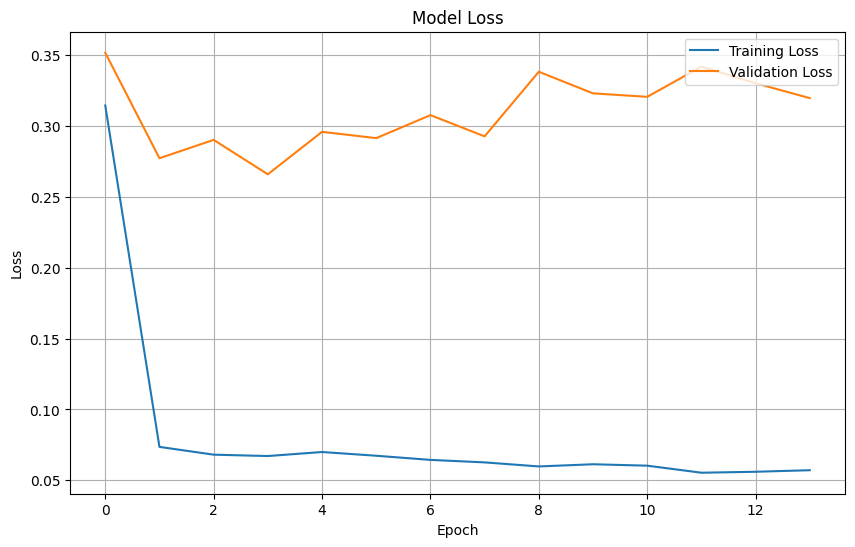

In [409]:
# Plotting training & validation loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history.get('val_loss'), label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [410]:
# # Test predictions over the entire test dataset (5 output at a time)
# predictions = []

# # Loop through each sample in the test dataset
# for i in range(len(X_test)):
#     # Extract the current sequence (8 time steps)
#     current_sequence = X_test[i]  # Get the ith row
    
#     # Reshape it to the correct shape for prediction: (1, 8, 1)
#     current_sequence = current_sequence.reshape(1, current_sequence.shape[0], 1)
    
#     # Debugging print statements
#     print(f"i = {i}, current_sequence shape = {current_sequence.shape}")
    
#     # Predict the next velocity based on the current sequence
#     next_5_velocities = lstm_model.predict(current_sequence, verbose=0) # verbose=0 : Silent mode - no output during training
    
#     # Append the predicted velocity to the predictions list
#     predictions.append(next_5_velocities[0, 0])
    
#     # Shift by 5 time steps
#     i += 5

# # Print the predicted velocities for the test dataset
# print("Predicted velocities for the test dataset are:", predictions)

In [411]:
# Make a copy of the test data to avoid modifying the original
X_test_copy = X_test.copy()

# List to store the predicted values for X and Y
predictions = []

# Loop through each sequence in the test dataset
for i in range(len(X_test_copy)):
    # Extract the current sequence (8 time steps)
    current_sequence = X_test_copy[i]  # Get the ith row

    # Reshape to the correct input shape for the model: (1, 8, 3)
    current_sequence = current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1])
    
    # Debugging print statements to verify the current sequence shape
    print(f"i = {i}, current_sequence shape = {current_sequence.shape}")

    # Predict the next x and y based on the current sequence
    next_xy = lstm_model.predict(current_sequence, verbose=0)  # Silent mode during prediction

    # Append the predicted x and y to the predictions list
    predictions.append(next_xy[0])  # Store the entire output vector for x and y

    # Update the test set to use the predicted values for the next sequence
    if i < len(X_test_copy) - 1:  # Prevent index out of range error
        X_test_copy[i + 1, -1, 1] = next_xy[0, 0]  # Update the last X value in the sequence
        X_test_copy[i + 1, -1, 2] = next_xy[0, 1]  # Update the last Y value in the sequence

# Separate the predictions into X and Y components for easier interpretation
predictions_x = [pred[0] for pred in predictions]
predictions_y = [pred[1] for pred in predictions]

# Print the predicted X and Y values for the test dataset
print("Predicted X values for the test dataset are:", predictions_x)
print("Predicted Y values for the test dataset are:", predictions_y)

i = 0, current_sequence shape = (1, 8, 3)
i = 1, current_sequence shape = (1, 8, 3)
i = 2, current_sequence shape = (1, 8, 3)
i = 3, current_sequence shape = (1, 8, 3)
i = 4, current_sequence shape = (1, 8, 3)
i = 5, current_sequence shape = (1, 8, 3)
i = 6, current_sequence shape = (1, 8, 3)
i = 7, current_sequence shape = (1, 8, 3)
i = 8, current_sequence shape = (1, 8, 3)
i = 9, current_sequence shape = (1, 8, 3)
i = 10, current_sequence shape = (1, 8, 3)
i = 11, current_sequence shape = (1, 8, 3)
i = 12, current_sequence shape = (1, 8, 3)
i = 13, current_sequence shape = (1, 8, 3)
i = 14, current_sequence shape = (1, 8, 3)
i = 15, current_sequence shape = (1, 8, 3)
i = 16, current_sequence shape = (1, 8, 3)
i = 17, current_sequence shape = (1, 8, 3)
i = 18, current_sequence shape = (1, 8, 3)
i = 19, current_sequence shape = (1, 8, 3)
i = 20, current_sequence shape = (1, 8, 3)
i = 21, current_sequence shape = (1, 8, 3)
i = 22, current_sequence shape = (1, 8, 3)
i = 23, current_seque

i = 190, current_sequence shape = (1, 8, 3)
i = 191, current_sequence shape = (1, 8, 3)
i = 192, current_sequence shape = (1, 8, 3)
i = 193, current_sequence shape = (1, 8, 3)
i = 194, current_sequence shape = (1, 8, 3)
i = 195, current_sequence shape = (1, 8, 3)
i = 196, current_sequence shape = (1, 8, 3)
i = 197, current_sequence shape = (1, 8, 3)
i = 198, current_sequence shape = (1, 8, 3)
i = 199, current_sequence shape = (1, 8, 3)
i = 200, current_sequence shape = (1, 8, 3)
i = 201, current_sequence shape = (1, 8, 3)
i = 202, current_sequence shape = (1, 8, 3)
i = 203, current_sequence shape = (1, 8, 3)
i = 204, current_sequence shape = (1, 8, 3)
i = 205, current_sequence shape = (1, 8, 3)
i = 206, current_sequence shape = (1, 8, 3)
i = 207, current_sequence shape = (1, 8, 3)
i = 208, current_sequence shape = (1, 8, 3)
i = 209, current_sequence shape = (1, 8, 3)
i = 210, current_sequence shape = (1, 8, 3)
i = 211, current_sequence shape = (1, 8, 3)
i = 212, current_sequence shape 

i = 379, current_sequence shape = (1, 8, 3)
i = 380, current_sequence shape = (1, 8, 3)
i = 381, current_sequence shape = (1, 8, 3)
i = 382, current_sequence shape = (1, 8, 3)
i = 383, current_sequence shape = (1, 8, 3)
i = 384, current_sequence shape = (1, 8, 3)
i = 385, current_sequence shape = (1, 8, 3)
i = 386, current_sequence shape = (1, 8, 3)
i = 387, current_sequence shape = (1, 8, 3)
i = 388, current_sequence shape = (1, 8, 3)
i = 389, current_sequence shape = (1, 8, 3)
i = 390, current_sequence shape = (1, 8, 3)
i = 391, current_sequence shape = (1, 8, 3)
i = 392, current_sequence shape = (1, 8, 3)
i = 393, current_sequence shape = (1, 8, 3)
i = 394, current_sequence shape = (1, 8, 3)
i = 395, current_sequence shape = (1, 8, 3)
i = 396, current_sequence shape = (1, 8, 3)
i = 397, current_sequence shape = (1, 8, 3)
i = 398, current_sequence shape = (1, 8, 3)
i = 399, current_sequence shape = (1, 8, 3)
i = 400, current_sequence shape = (1, 8, 3)
i = 401, current_sequence shape 

i = 567, current_sequence shape = (1, 8, 3)
i = 568, current_sequence shape = (1, 8, 3)
i = 569, current_sequence shape = (1, 8, 3)
i = 570, current_sequence shape = (1, 8, 3)
i = 571, current_sequence shape = (1, 8, 3)
i = 572, current_sequence shape = (1, 8, 3)
i = 573, current_sequence shape = (1, 8, 3)
i = 574, current_sequence shape = (1, 8, 3)
i = 575, current_sequence shape = (1, 8, 3)
i = 576, current_sequence shape = (1, 8, 3)
i = 577, current_sequence shape = (1, 8, 3)
i = 578, current_sequence shape = (1, 8, 3)
i = 579, current_sequence shape = (1, 8, 3)
i = 580, current_sequence shape = (1, 8, 3)
i = 581, current_sequence shape = (1, 8, 3)
i = 582, current_sequence shape = (1, 8, 3)
i = 583, current_sequence shape = (1, 8, 3)
i = 584, current_sequence shape = (1, 8, 3)
i = 585, current_sequence shape = (1, 8, 3)
i = 586, current_sequence shape = (1, 8, 3)
i = 587, current_sequence shape = (1, 8, 3)
i = 588, current_sequence shape = (1, 8, 3)
i = 589, current_sequence shape 

i = 755, current_sequence shape = (1, 8, 3)
i = 756, current_sequence shape = (1, 8, 3)
i = 757, current_sequence shape = (1, 8, 3)
i = 758, current_sequence shape = (1, 8, 3)
i = 759, current_sequence shape = (1, 8, 3)
i = 760, current_sequence shape = (1, 8, 3)
i = 761, current_sequence shape = (1, 8, 3)
i = 762, current_sequence shape = (1, 8, 3)
i = 763, current_sequence shape = (1, 8, 3)
i = 764, current_sequence shape = (1, 8, 3)
i = 765, current_sequence shape = (1, 8, 3)
i = 766, current_sequence shape = (1, 8, 3)
i = 767, current_sequence shape = (1, 8, 3)
i = 768, current_sequence shape = (1, 8, 3)
i = 769, current_sequence shape = (1, 8, 3)
i = 770, current_sequence shape = (1, 8, 3)
i = 771, current_sequence shape = (1, 8, 3)
i = 772, current_sequence shape = (1, 8, 3)
i = 773, current_sequence shape = (1, 8, 3)
i = 774, current_sequence shape = (1, 8, 3)
i = 775, current_sequence shape = (1, 8, 3)
i = 776, current_sequence shape = (1, 8, 3)
i = 777, current_sequence shape 

i = 944, current_sequence shape = (1, 8, 3)
i = 945, current_sequence shape = (1, 8, 3)
i = 946, current_sequence shape = (1, 8, 3)
i = 947, current_sequence shape = (1, 8, 3)
i = 948, current_sequence shape = (1, 8, 3)
i = 949, current_sequence shape = (1, 8, 3)
i = 950, current_sequence shape = (1, 8, 3)
i = 951, current_sequence shape = (1, 8, 3)
i = 952, current_sequence shape = (1, 8, 3)
i = 953, current_sequence shape = (1, 8, 3)
i = 954, current_sequence shape = (1, 8, 3)
i = 955, current_sequence shape = (1, 8, 3)
i = 956, current_sequence shape = (1, 8, 3)
i = 957, current_sequence shape = (1, 8, 3)
i = 958, current_sequence shape = (1, 8, 3)
i = 959, current_sequence shape = (1, 8, 3)
i = 960, current_sequence shape = (1, 8, 3)
i = 961, current_sequence shape = (1, 8, 3)
i = 962, current_sequence shape = (1, 8, 3)
i = 963, current_sequence shape = (1, 8, 3)
i = 964, current_sequence shape = (1, 8, 3)
i = 965, current_sequence shape = (1, 8, 3)
i = 966, current_sequence shape 

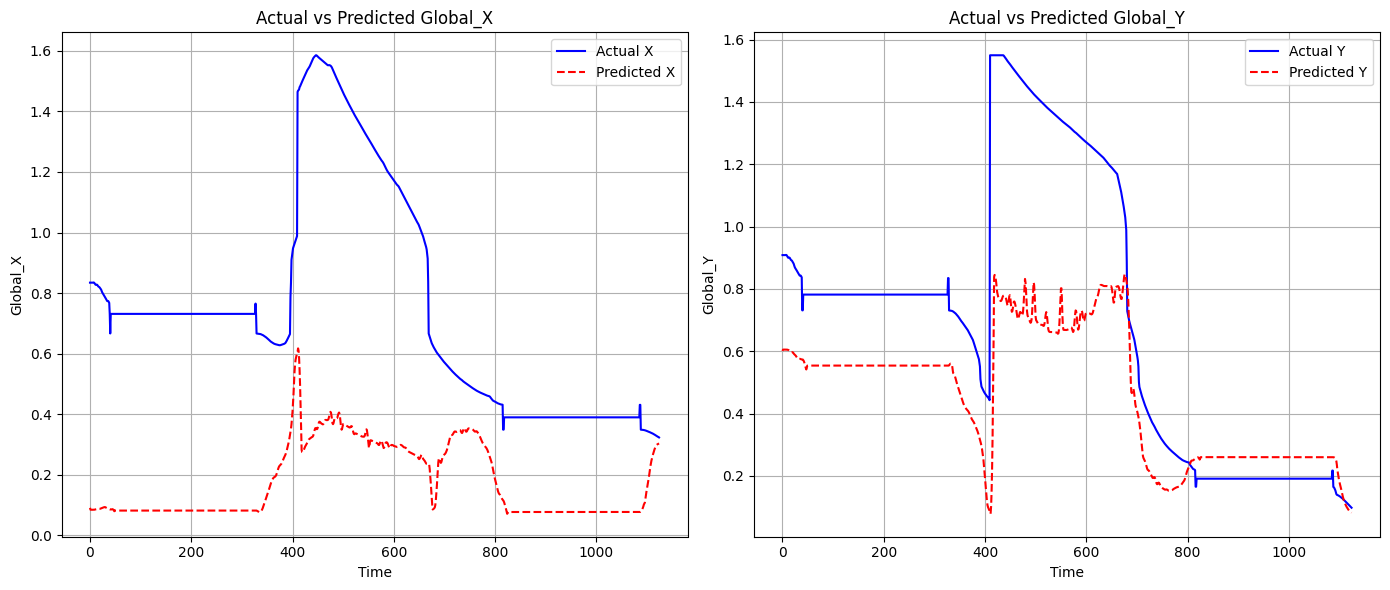

In [412]:
# Assuming y_test contains the true values for Global_X and Global_Y
true_x = y_test[:, 0]  # True values for Global_X
true_y = y_test[:, 1]  # True values for Global_Y

# Convert predictions_x and predictions_y lists to numpy arrays if they aren't already
predicted_x = np.array(predictions_x)
predicted_y = np.array(predictions_y)

# Create time indices for the test dataset
time_indices = np.arange(len(true_x))

# Create a DataFrame to store the actual and predicted values with the time indices
results_df = pd.DataFrame({
    'Time': time_indices,
    'Actual X': true_x,
    'Predicted X': predicted_x,
    'Actual Y': true_y,
    'Predicted Y': predicted_y
})

# Plotting the actual and predicted values for Global_X and Global_Y
plt.figure(figsize=(14, 6))

# Subplot for Global_X
plt.subplot(1, 2, 1)
plt.plot(results_df['Time'], results_df['Actual X'], label='Actual X', color='blue')
plt.plot(results_df['Time'], results_df['Predicted X'], label='Predicted X', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Global_X')
plt.title('Actual vs Predicted Global_X')
plt.legend()
plt.grid(True)

# Subplot for Global_Y
plt.subplot(1, 2, 2)
plt.plot(results_df['Time'], results_df['Actual Y'], label='Actual Y', color='blue')
plt.plot(results_df['Time'], results_df['Predicted Y'], label='Predicted Y', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Global_Y')
plt.title('Actual vs Predicted Global_Y')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
true_values_df = np.array(true_values_to_compare)
predictions_values_df = np.array(all_predictions)

# Ensure both arrays have identical shapes
assert true_values_df.shape == predictions_values_df.shape, "Datasets must have the same shape!"

# Calculate RMSE using the mathematical formula
def calculate_rmse(true_values, predicted_values):
    # Calculate the mean square error
    mse = np.mean((true_values - predicted_values) ** 2)
    # Take the square root of the mean square error to get RMSE
    rmse = np.sqrt(mse)
    return rmse

# Apply RMSE calculation on all values
rmse = calculate_rmse(true_values_df, predictions_values_df)

print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 3.6881373379570936


In [134]:
### ADDITIONAL LINE OF CODES ###

test_predicted_values = lstm_model.predict(X_test)

# Extract the velocity predictions for t, t+1, t+2
predicted_velocities_t = test_predicted_values[:, 0]  # Prediction at time t
predicted_velocities_t1 = test_predicted_values[:, 1]  # Prediction at time t+1
predicted_velocities_t2 = test_predicted_values[:, 2]  # Prediction at time t+2

# The true values for comparison
true_velocities_t = y_test[:, 0]  # Actual value at time t
true_velocities_t1 = y_test[:, 1]  # Actual value at time t+1
true_velocities_t2 = y_test[:, 2]  # Actual value at time t+2

rmse_t = np.sqrt(mean_squared_error(true_velocities_t, predicted_velocities_t))
rmse_t1 = np.sqrt(mean_squared_error(true_velocities_t1, predicted_velocities_t1))
rmse_t2 = np.sqrt(mean_squared_error(true_velocities_t2, predicted_velocities_t2))

print(f"RMSE at time t: {rmse_t:.4f}")
print(f"RMSE at time t+1: {rmse_t1:.4f}")
print(f"RMSE at time t+2: {rmse_t2:.4f}")

39/39 [==============================] - 0s 7ms/step
RMSE at time t: 2.2646
RMSE at time t+1: 3.0155
RMSE at time t+2: 3.8334


In [61]:
rmse_overall = np.sqrt(mean_squared_error(y_test.flatten(), test_predicted_values.flatten()))
print(f"Overall RMSE for t, t+1, t+2: {rmse_overall:.4f}")

Overall RMSE for t, t+1, t+2: 3.7597


In [62]:
# # Visualising one at a time
# # Create time indices for the test dataset
# time_indices = np.arange(len(true_velocities_t))

# # Plotting the true and predicted velocities for t, t+1, and t+2
# plt.figure(figsize=(14, 8))

# # Plot for time t
# plt.subplot(3, 1, 1)
# plt.plot(time_indices, true_velocities_t, label='True Velocity at t', color='blue')
# plt.plot(time_indices, predicted_velocities_t, label='Predicted Velocity at t', color='red', linestyle='--')
# plt.xlabel('Time')
# plt.ylabel('Velocity')
# plt.title(f'Velocity at time t (RMSE: {rmse_t:.4f})')
# plt.legend()

# # Plot for time t+1
# plt.subplot(3, 1, 2)
# plt.plot(time_indices, true_velocities_t1, label='True Velocity at t+1', color='blue')
# plt.plot(time_indices, predicted_velocities_t1, label='Predicted Velocity at t+1', color='red', linestyle='--')
# plt.xlabel('Time')
# plt.ylabel('Velocity')
# plt.title(f'Velocity at time t+1 (RMSE: {rmse_t1:.4f})')
# plt.legend()

# # Plot for time t+2
# plt.subplot(3, 1, 3)
# plt.plot(time_indices, true_velocities_t2, label='True Velocity at t+2', color='blue')
# plt.plot(time_indices, predicted_velocities_t2, label='Predicted Velocity at t+2', color='red', linestyle='--')
# plt.xlabel('Time')
# plt.ylabel('Velocity')
# plt.title(f'Velocity at time t+2 (RMSE: {rmse_t2:.4f})')
# plt.legend()

# plt.tight_layout()
# plt.show()

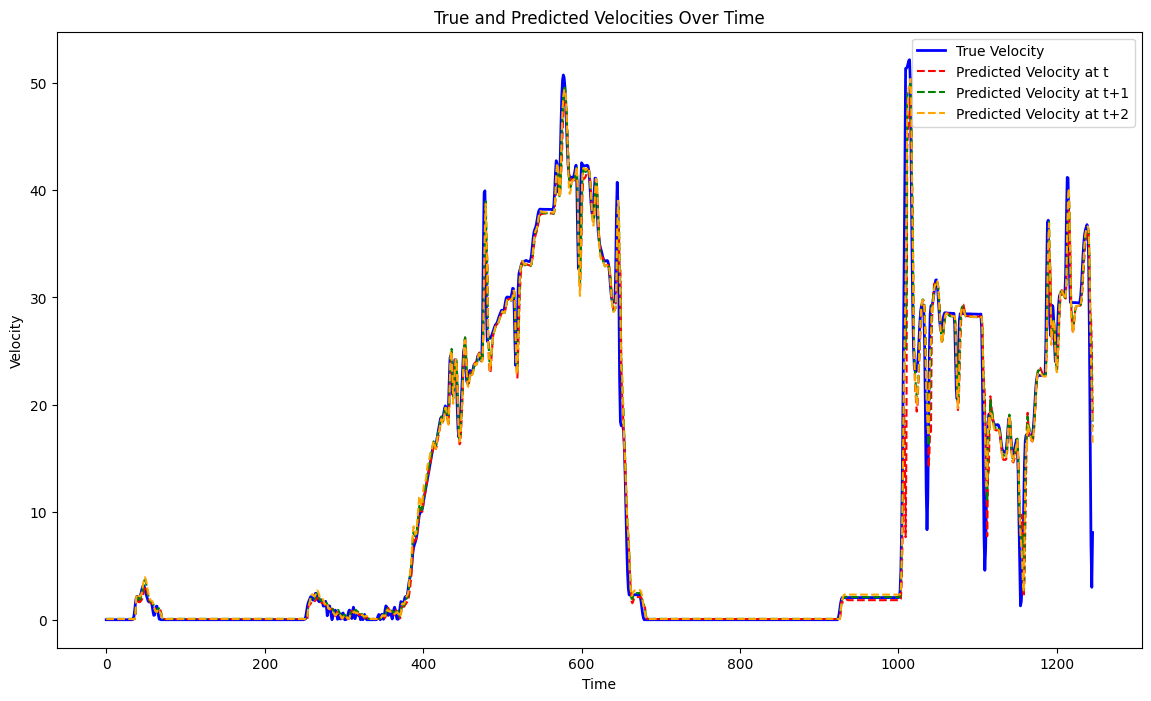

In [63]:
# Visualising all at once
# Create time indices for the test dataset
time_indices = np.arange(len(true_velocities_t))

# Plotting the true and predicted velocities
plt.figure(figsize=(14, 8))

# Plot for the true velocity at time t
plt.plot(time_indices, true_velocities_t, label='True Velocity', color='blue', linewidth=2)

# Plot for the predicted velocity at time t
plt.plot(time_indices, predicted_velocities_t, label='Predicted Velocity at t', color='red', linestyle='--')

# Plot for the predicted velocity at time t+1
plt.plot(time_indices, predicted_velocities_t1, label='Predicted Velocity at t+1', color='green', linestyle='--')

# Plot for the predicted velocity at time t+2
plt.plot(time_indices, predicted_velocities_t2, label='Predicted Velocity at t+2', color='orange', linestyle='--')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('True and Predicted Velocities Over Time')
plt.legend()

# Show plot
plt.show()

In [64]:
# Use the last known sequence from the test set for prediction
last_sequence = X_test[-1]

# Number of future steps to predict
n_steps = 6
predictions = []

for _ in range(n_steps):
    # Predict the next velocity
    next_velocity = lstm_model.predict(last_sequence.reshape(1, last_sequence.shape[0], 1), verbose=0)
    
    # Append the predicted velocity to the predictions list
    predictions.append(next_velocity[0, 0])
    
    # Update the sequence: remove the oldest velocity and add the predicted one
    last_sequence = np.append(last_sequence[1:], next_velocity[0, 0]).reshape(-1, 1)

# Print the predicted velocities for the next 6 steps
print("Predicted velocities for the next 6 time steps:", predictions)

# Convert the predictions into a DataFrame for easier handling
predicted_df = pd.DataFrame(predictions, columns=['Predicted Velocity'])

print(predicted_df)

Predicted velocities for the next 6 time steps: [19.177599, 10.791701, 12.173905, 7.880661, 7.9354377, 5.0301857]
   Predicted Velocity
0           19.177599
1           10.791701
2           12.173905
3            7.880661
4            7.935438
5            5.030186


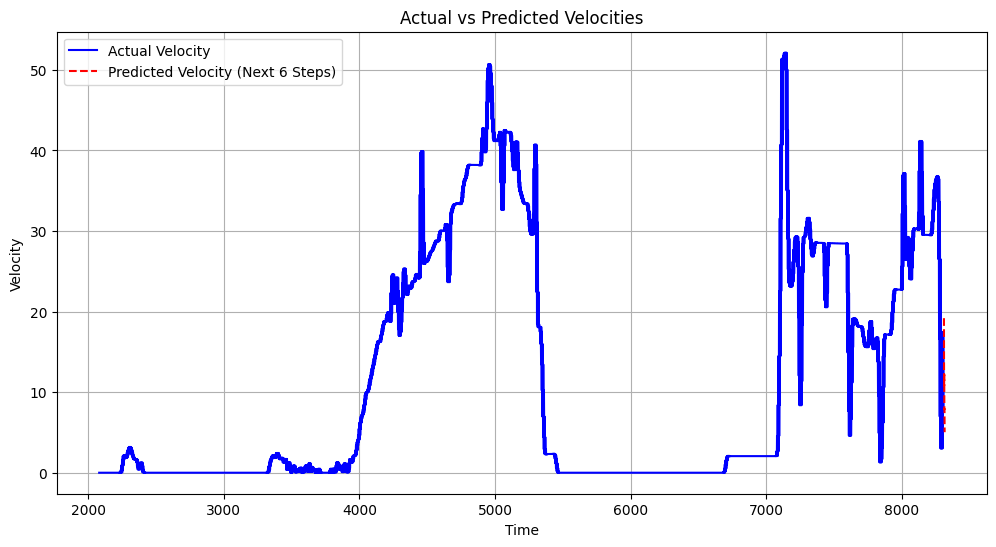

In [65]:
# Ensure the true_velocities is flattened correctly
true_velocities = y_test.flatten()

# Number of actual data points for plotting
n_true_points = len(true_velocities)

# Adjust the time indices to match the length of the true velocities
time_indices = np.arange(len(single_vehicle_data) - n_true_points, len(single_vehicle_data))

# Ensure both time_indices and true_velocities have the same length
if len(time_indices) != len(true_velocities):
    raise ValueError(f"Length of time_indices ({len(time_indices)}) does not match length of true_velocities ({len(true_velocities)}).")

# Create DataFrame for actual values (trim the time indices to match true_velocities)
actual_df = pd.DataFrame({
    'Time': time_indices,
    'Actual Velocity': true_velocities
})

# Create time indices for the predictions
predicted_time_indices = np.arange(len(single_vehicle_data), len(single_vehicle_data) + len(predictions))

# Create DataFrame for predicted values
predicted_df = pd.DataFrame({
    'Time': predicted_time_indices,
    'Predicted Velocity': predictions
})

# Plotting the actual and predicted velocities
plt.figure(figsize=(12, 6))

# Plot the actual velocities
plt.plot(actual_df['Time'], actual_df['Actual Velocity'], label='Actual Velocity', color='blue')

# Plot the predicted velocities
plt.plot(predicted_df['Time'], predicted_df['Predicted Velocity'], label='Predicted Velocity (Next 6 Steps)', color='red', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Actual vs Predicted Velocities')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()